In [93]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Metrics
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")


In [94]:
import warnings
warnings.simplefilter(action='ignore')

In [95]:
df=pd.read_excel('train(1).xlsx')

In [96]:
df.head()

id             date   price  bedrooms  bathrooms  sqft_living  \
0  9117000170  20150505T000000  268643         4       2.25         1810   
1  6700390210  20140708T000000  245000         3       2.50         1600   
2  7212660540  20150115T000000  200000         4       2.50         1720   
3  8562780200  20150427T000000  352499         2       2.25         1240   
4  7760400350  20141205T000000  232000         3       2.00         1280   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      9240     2.0           0     0  ...      7        1810              0   
1      2788     2.0           0     0  ...      7        1600              0   
2      8638     2.0           0     0  ...      8        1720              0   
3       705     2.0           0     0  ...      7        1150             90   
4     13356     1.0           0     0  ...      7        1280              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1961             0    98055  47.4362 -122.187           1660   
1      1992             0    98031  47.4034 -122.187           1720   
2      1994             0    98003  47.2704 -122.313           1870   
3      2009             0    98027  47.5321 -122.073           1240   
4      1994             0    98042  47.3715 -122.074           1590   

   sqft_lot15  
0        9240  
1        3605  
2        7455  
3         750  
4        8071  

[5 rows x 21 columns]

In [97]:
df.shape

(16209, 21)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

In [99]:
df.duplicated().sum()

0

In [100]:
df.describe()

id         price     bedrooms     bathrooms   sqft_living  \
count  1.620900e+04  1.620900e+04  16209.00000  16209.000000  16209.000000   
mean   4.575771e+09  5.374703e+05      3.36782      2.113054   2073.274601   
std    2.874661e+09  3.603036e+05      0.93327      0.765242    907.009491   
min    1.000102e+06  7.500000e+04      0.00000      0.000000    290.000000   
25%    2.123049e+09  3.200000e+05      3.00000      1.500000   1430.000000   
50%    3.904950e+09  4.500000e+05      3.00000      2.250000   1910.000000   
75%    7.304301e+09  6.400000e+05      4.00000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.00000      8.000000  12050.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  1.620900e+04  16209.000000  16209.000000  16209.000000  16209.000000   
mean   1.486767e+04      1.498828      0.006971      0.234253      3.407860   
std    3.882570e+04      0.543032      0.083206      0.763152      0.651553   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.004000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.599000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.063100e+04      2.000000      0.000000      0.000000      4.000000   
max    1.164794e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  16209.000000  16209.000000   16209.000000  16209.000000  16209.000000   
mean       7.652971   1784.754396     288.520205   1971.152755     82.738108   
std        1.171050    821.820844     438.598910     29.372698    397.861148   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1200.000000       0.000000   1952.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2200.000000     560.000000   1997.000000      0.000000   
max       13.000000   8860.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  16209.000000  16209.000000  16209.000000   16209.000000   16209.000000  
mean   98077.974767     47.560707   -122.214003    1983.152261   12735.572707  
std       53.355282      0.138340      0.140093     681.905161   26933.162012  
min    98001.000000     47.159300   -122.519000     399.000000     651.000000  
25%    98033.000000     47.472500   -122.328000    1480.000000    5098.000000  
50%    98065.000000     47.572400   -122.230000    1840.000000    7620.000000  
75%    98117.000000     47.678200   -122.125000    2360.000000   10053.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [102]:
import os

# 🔴 CHANGE THIS to the *images folder*, NOT zip
IMAGE_DIR = r"C:\Users\kalpe\Documents\python\cdc_open_project\data_final\data_final\images"

TOTAL_IMAGES = 16209

existing_files = os.listdir(IMAGE_DIR)

existing_indices = set(
    int(f.split(".")[0])
    for f in existing_files
    if f.endswith(".png") and f.split(".")[0].isdigit()
)


In [103]:
expected_indices = set(range(TOTAL_IMAGES))
missing_indices = sorted(expected_indices - existing_indices)

print(f"Expected images : {TOTAL_IMAGES}")
print(f"Found images    : {len(existing_indices)}")
print(f"Missing images  : {len(missing_indices)}")

# show first few missing (if any)
missing_indices[:20]


Expected images : 16209
Found images    : 16209
Missing images  : 0


[]

# Target variable analysis (EDA)

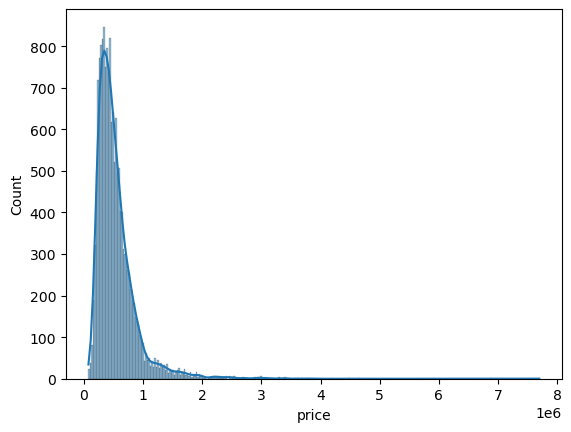

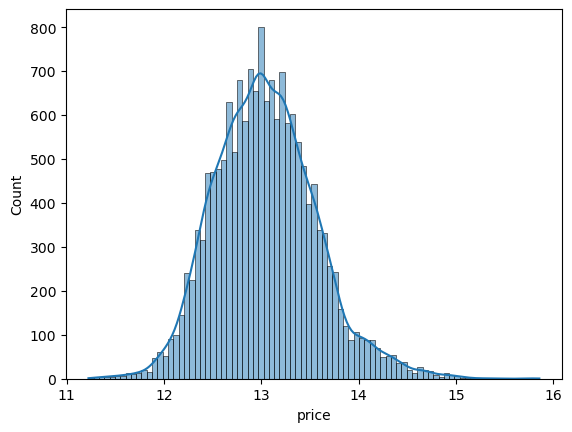

In [105]:
sns.histplot(df['price'], kde=True)
plt.show()

sns.histplot(np.log(df['price']), kde=True)
plt.show()

- # Relationship between target and key features

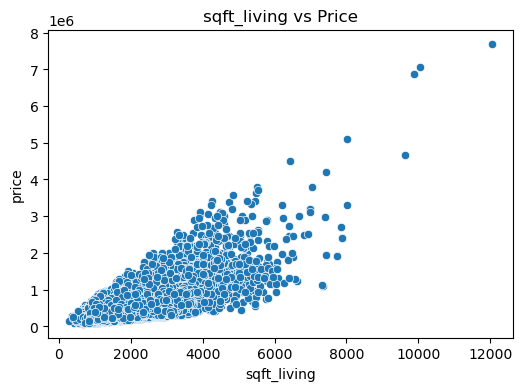

In [107]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['sqft_living'], y=df['price'])
plt.title('sqft_living vs Price')
plt.show()

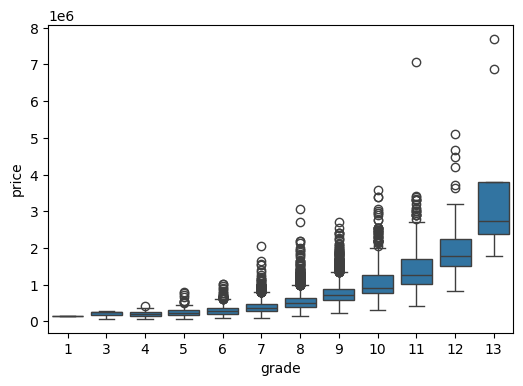

In [108]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['grade'], y=df['price'])
plt.show()

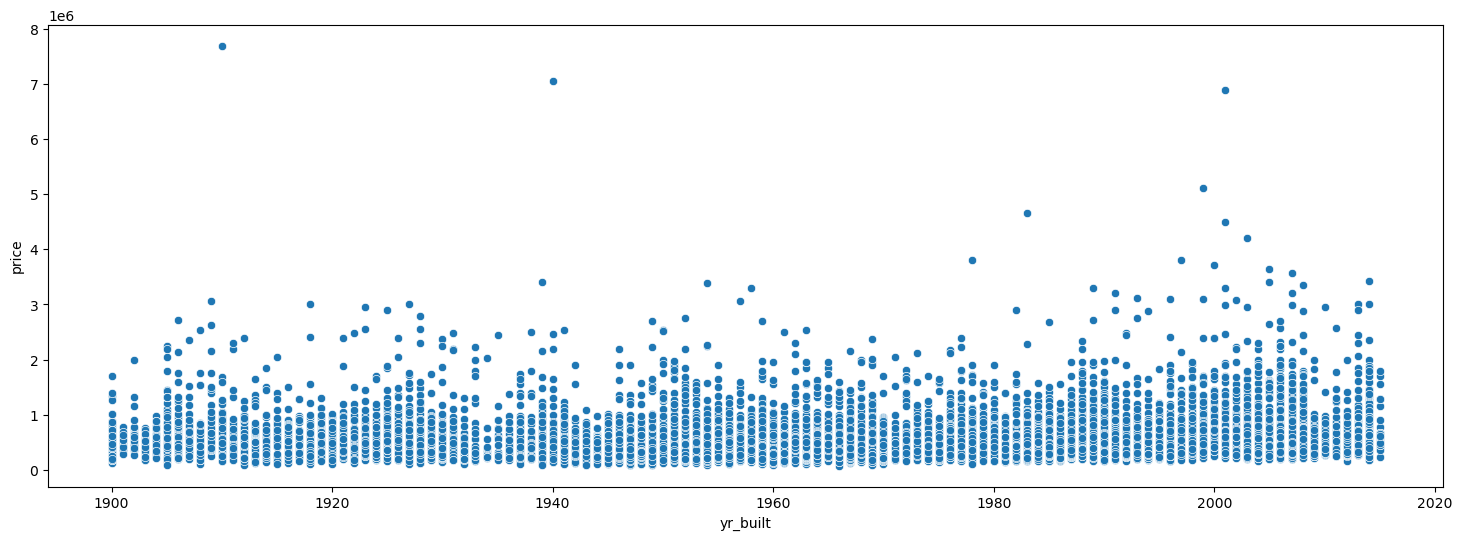

In [109]:
plt.figure(figsize=(18,6))
sns.scatterplot(x=df['yr_built'], y=df['price'])
plt.show()

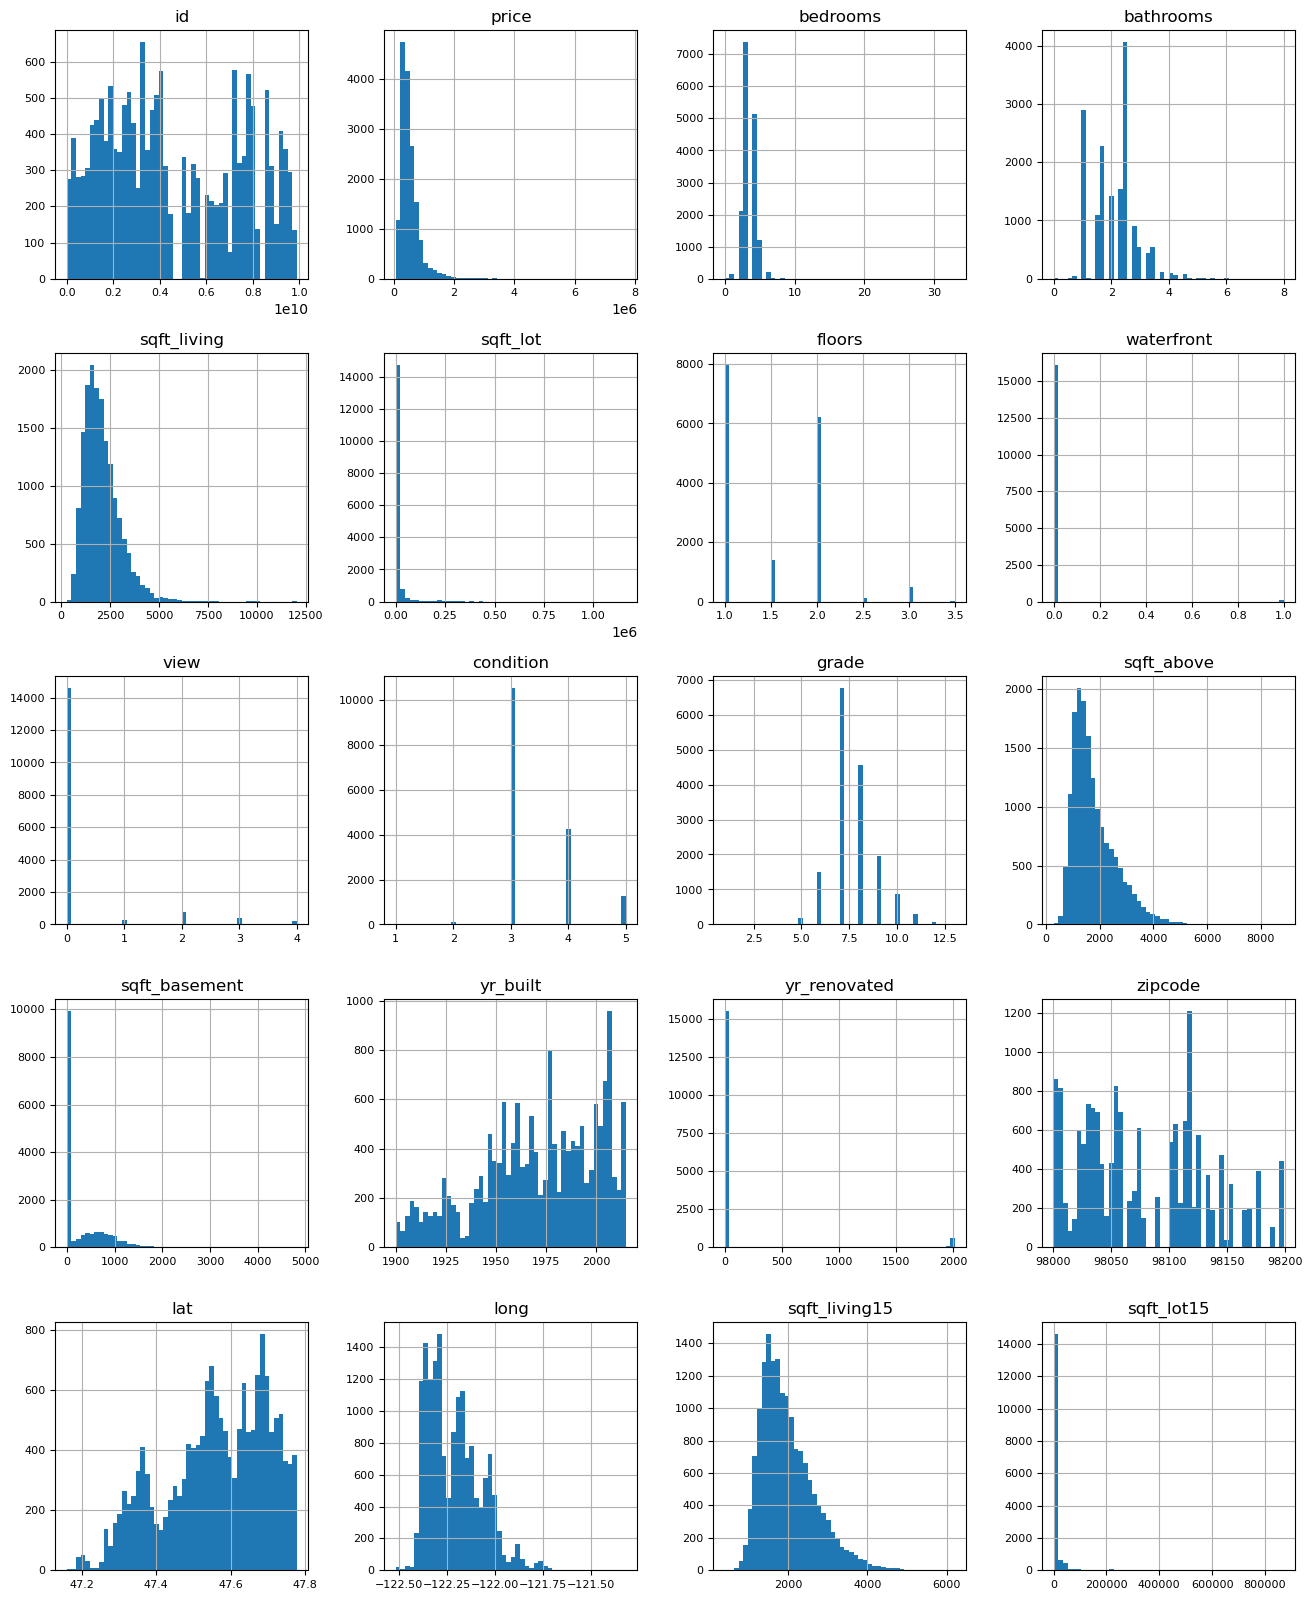

In [110]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

# Geospatial Analysis with help of image and tabular data

- Geospatial Distribution of House Prices

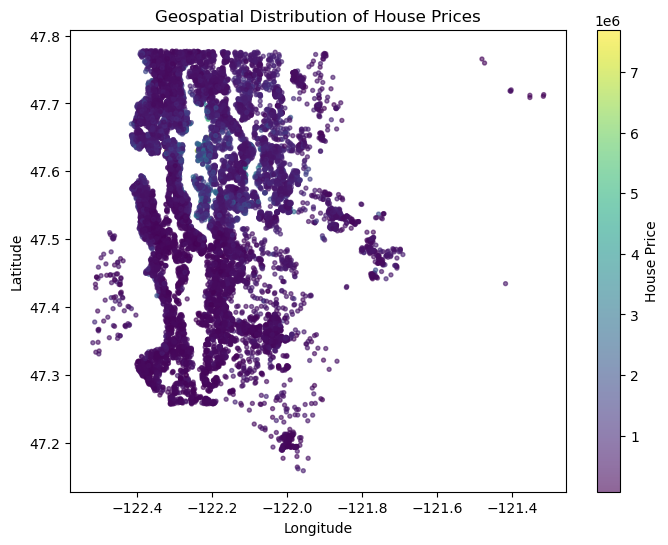

In [113]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(
    df["long"],
    df["lat"],
    c=df["price"],
    cmap="viridis",
    s=8,
    alpha=0.6
)
plt.colorbar(label="House Price")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geospatial Distribution of House Prices")
plt.show()


- price distribution if waterfront is present or not

In [115]:
df.groupby("waterfront")["price"].describe()


count          mean           std       min       25%  \
waterfront                                                            
0           16096.0  5.300675e+05  3.380519e+05   75000.0  320000.0   
1             113.0  1.591938e+06  1.111034e+06  285000.0  735000.0   

                  50%        75%        max  
waterfront                                   
0            450000.0   635000.0  7700000.0  
1           1360000.0  2000000.0  7062500.0

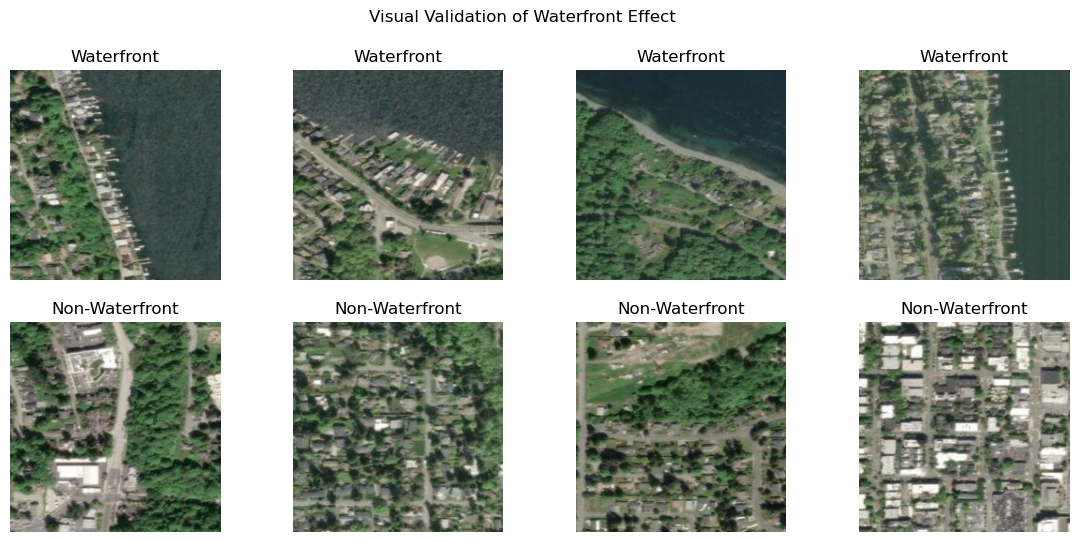

In [116]:
from PIL import Image

water_ids = df[df["waterfront"] == 1].sample(4, random_state=42).index
non_water_ids = df[df["waterfront"] == 0].sample(4, random_state=42).index

fig, axes = plt.subplots(2, 4, figsize=(14,6))

for i, idx in enumerate(water_ids):
    axes[0,i].imshow(Image.open(f"data_final/data_final/images/{idx}.png"))
    axes[0,i].set_title("Waterfront")
    axes[0,i].axis("off")

for i, idx in enumerate(non_water_ids):
    axes[1,i].imshow(Image.open(f"data_final/data_final/images/{idx}.png"))
    axes[1,i].set_title("Non-Waterfront")
    axes[1,i].axis("off")

plt.suptitle("Visual Validation of Waterfront Effect")
plt.show()


- Neighborhood Density vs Price

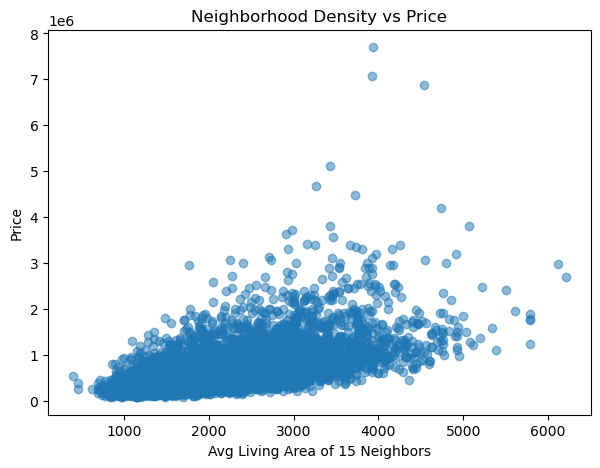

In [118]:
plt.figure(figsize=(7,5))
plt.scatter(
    df["sqft_living15"],
    df["price"],
    alpha=0.5
)
plt.xlabel("Avg Living Area of 15 Neighbors")
plt.ylabel("Price")
plt.title("Neighborhood Density vs Price")
plt.show()


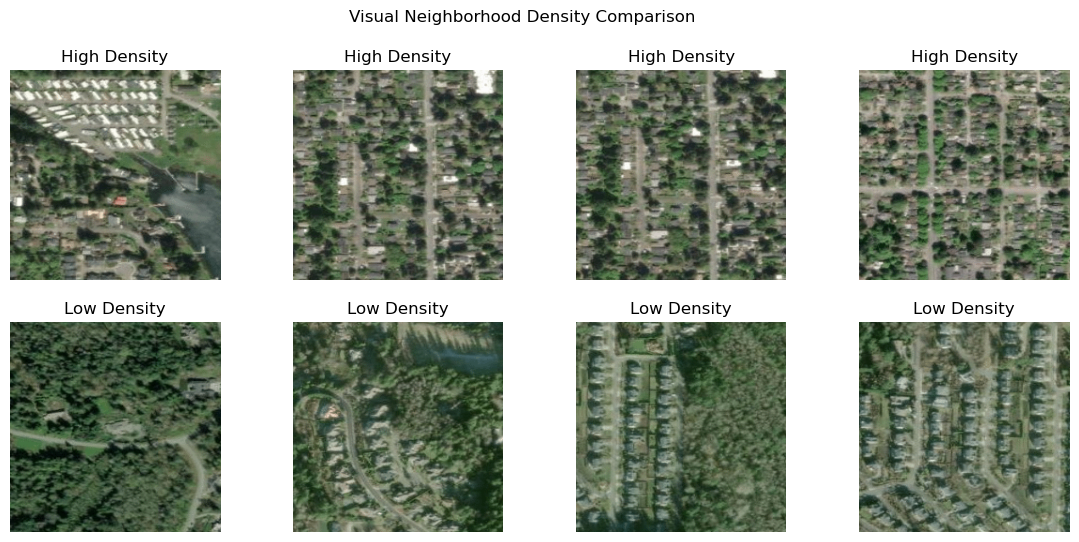

In [119]:
# pick houses with similar size but different neighborhood density
dense_ids = df.sort_values("sqft_living15").head(4).index
sparse_ids = df.sort_values("sqft_living15", ascending=False).head(4).index

fig, axes = plt.subplots(2, 4, figsize=(14,6))

for i, idx in enumerate(dense_ids):
    axes[0,i].imshow(Image.open(f"data_final/data_final/images/{idx}.png"))
    axes[0,i].set_title("High Density")
    axes[0,i].axis("off")

for i, idx in enumerate(sparse_ids):
    axes[1,i].imshow(Image.open(f"data_final/data_final/images/{idx}.png"))
    axes[1,i].set_title("Low Density")
    axes[1,i].axis("off")

plt.suptitle("Visual Neighborhood Density Comparison")
plt.show()


- Curb Appeal & Visual Context vs Price

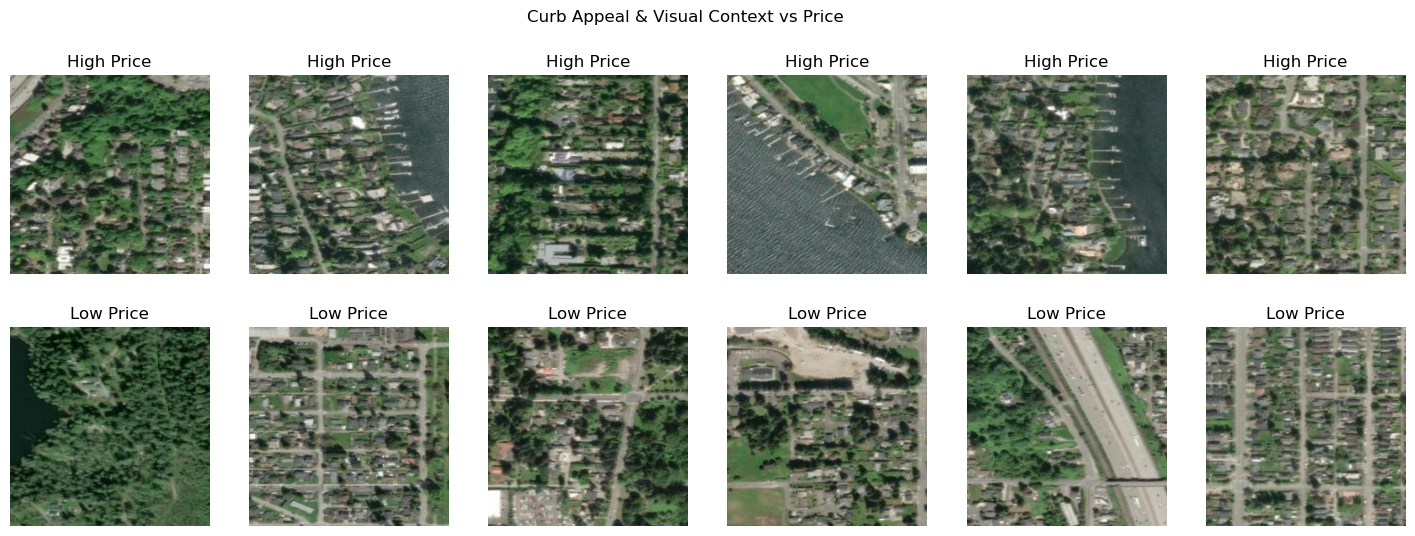

In [121]:
high_price_ids = df.sort_values("price", ascending=False).head(6).index
low_price_ids = df.sort_values("price").head(6).index

fig, axes = plt.subplots(2, 6, figsize=(18,6))

for i, idx in enumerate(high_price_ids):
    axes[0,i].imshow(Image.open(f"data_final/data_final/images/{idx}.png"))
    axes[0,i].set_title("High Price")
    axes[0,i].axis("off")

for i, idx in enumerate(low_price_ids):
    axes[1,i].imshow(Image.open(f"data_final/data_final/images/{idx}.png"))
    axes[1,i].set_title("Low Price")
    axes[1,i].axis("off")

plt.suptitle("Curb Appeal & Visual Context vs Price")
plt.show()


- waterfront is playing an important role
- density is also a prominent factor
- more greenery means no facility and road and all so it 